In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_excel('Extended_Employee_Performance_and_Productivity_Data.xlsx', index_col=None)

df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,False


In [ ]:
ineffective_features = ["Employee_ID","Hire_Date"]
df = df.drop(columns = ineffective_features, axis = 1 )

df.head

<bound method NDFrame.head of              Department  Gender  Age   Job_Title  Years_At_Company  \
0                    IT    Male   55  Specialist                 2   
1               Finance    Male   29   Developer                 0   
2               Finance    Male   55  Specialist                 8   
3      Customer Support  Female   48     Analyst                 7   
4           Engineering  Female   36     Analyst                 3   
...                 ...     ...  ...         ...               ...   
99995           Finance    Male   27  Technician                 1   
99996                IT  Female   36  Consultant                 6   
99997        Operations    Male   53     Analyst                 8   
99998                HR  Female   22  Consultant                 9   
99999           Finance  Female   43     Analyst                 0   

      Education_Level  Performance_Score  Monthly_Salary  Work_Hours_Per_Week  \
0         High School                  5        

In [ ]:
label_encoders = {}
for column in ["Department","Gender", "Job_Title", "Education_Level"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
display(df.head(3))

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,4,1,55,5,2,1,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,1,29,2,0,1,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,2,1,55,5,8,1,3,5850,37,27,6,3,50,10,1,0,3.17,False


In [ ]:
y = df["Resigned"]
x = df.drop("Resigned", axis = 1)

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.78, random_state=42)

In [ ]:
# Hyperparameter Tuning for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_

# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

# Hyperparameter Tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_

# Evaluate all models on the test set
models = {
    "Decision Tree": dt_best_model,
    "Random Forest": rf_best_model,
    "XGBoost": xgb_best_model
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("-" * 50)

# Display the best hyperparameters for each model
print("Best Hyperparameters:")
print("Decision Tree:", dt_grid.best_params_)
print("Random Forest:", rf_grid.best_params_)
print("XGBoost:", xgb_grid.best_params_)

/Users/virajvijaywargiya/miniconda3/envs/cs178/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/virajvijaywargiya/miniconda3/envs/cs178/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/virajvijaywargiya/miniconda3/envs/cs178/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/virajvijaywargiya/miniconda3/envs/cs178/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/lea

Model: Decision Tree
Accuracy: 0.7348722093140722
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.64      0.71     19706
        True       0.70      0.83      0.76     19890

    accuracy                           0.73     39596
   macro avg       0.74      0.73      0.73     39596
weighted avg       0.74      0.73      0.73     39596

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8439993938781695
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.82      0.84     19706
        True       0.83      0.87      0.85     19890

    accuracy                           0.84     39596
   macro avg       0.84      0.84      0.84     39596
weighted avg       0.84      0.84      0.84     39596

--------------------------------------------------
Model: XGBoost
Accuracy: 0.8908223052833619
Classification Report:
              precision    reca

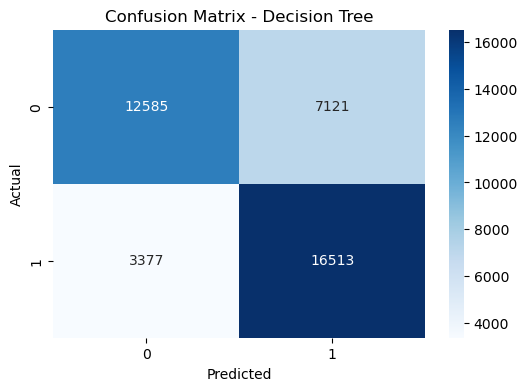

Model: Decision Tree
Class 0 Accuracy: 0.6386
Class 1 Accuracy: 0.8302
--------------------------------------------------


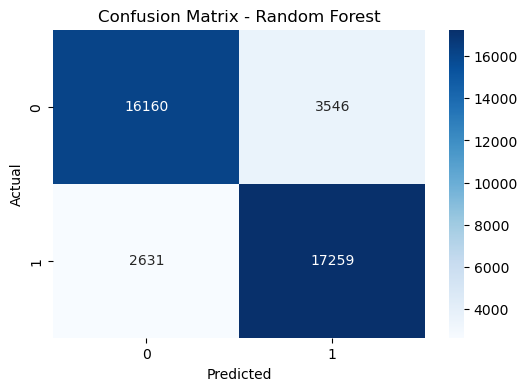

Model: Random Forest
Class 0 Accuracy: 0.8201
Class 1 Accuracy: 0.8677
--------------------------------------------------


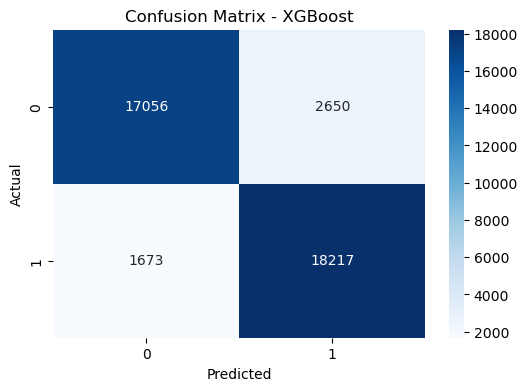

Model: XGBoost
Class 0 Accuracy: 0.8655
Class 1 Accuracy: 0.9159
--------------------------------------------------


In [ ]:
# Function to calculate stratified accuracy scores
def calculate_stratified_accuracy(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    return class_accuracies

# Evaluate models and output confusion matrices and stratified accuracy scores
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Stratified Accuracy Scores
    stratified_accuracy = calculate_stratified_accuracy(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Class 0 Accuracy: {stratified_accuracy[0]:.4f}")
    print(f"Class 1 Accuracy: {stratified_accuracy[1]:.4f}")
    print("-" * 50)


### Key Insights into Resignation Drivers:
Performance Scores: Lower performance scores were strongly associated with resignations. Employees with poor evaluations are more likely to leave.

Satisfaction Scores: Dissatisfaction is a major resignation driver, with resigned employees having lower satisfaction scores.

Overtime Hours: Employees with higher overtime intensity showed higher resignation tendencies, potentially indicating burnout.

Remote Work: Employees with less frequent remote work showed slightly higher resignation rates, possibly due to lower flexibility.

Team Dynamics: Large teams had a slight positive correlation with resignations, suggesting workload or team issues.

Expected values
stratified accuracy

min expected cost


In [ ]:
# Assuming "current employees" means filtering employees who have not resigned in the dataset
current_employees = df[df['Resigned'] == 0].drop(columns=['Resigned'])

# Predict the likelihood of resignation (probabilities) for current employees using the best model
current_employees['Churn_Probability'] = xgb_best_model.predict_proba(current_employees)[:, 1]

# Display the top at-risk employees based on churn probability
top_risk_employees = current_employees.sort_values(by='Churn_Probability', ascending=False).head(10)

display(top_risk_employees)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Top At-Risk Employees Based on Churn Probability", dataframe=top_risk_employees)


,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Churn_Probability
58580,4,1,50,3,2,0,5,9000,51,9,24,4,75,5,83,0,3.21,0.996288
99206,5,0,28,2,4,0,5,7500,47,12,11,5,50,8,65,1,3.32,0.994918
73562,5,0,39,6,5,1,5,5250,48,31,8,6,50,16,94,0,1.94,0.993355
64661,0,0,50,3,5,0,1,6600,44,21,23,10,50,7,29,0,1.63,0.991138
37715,4,0,25,6,5,1,3,4550,47,24,11,2,25,7,25,0,2.99,0.990026
5845,5,0,35,0,4,0,2,4800,59,45,15,4,100,4,75,1,3.43,0.990007
79293,1,0,41,5,2,1,3,5850,45,33,26,2,50,10,55,1,3.34,0.989179
32156,3,0,55,1,1,1,3,7150,34,9,20,12,0,13,92,0,2.42,0.987829
90994,5,0,37,5,7,0,2,5400,46,42,17,5,0,12,78,0,3.58,0.986527
99289,3,0,33,1,3,1,5,8250,45,12,13,4,0,11,84,0,2.77,0.986273


In [ ]:
# top_risk_employees = top_risk_employees.drop('level_0', axis = 1 )

current_employees.reset_index()

,index,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Churn_Probability
0,0,4,1,55,5,2,1,5,6750,33,32,22,2,0,14,66,0,2.63,0.441406
1,1,2,1,29,2,0,1,5,7500,34,34,13,14,100,12,61,2,1.72,0.001716
2,2,2,1,55,5,8,1,3,5850,37,27,6,3,50,10,1,0,3.17,0.081848
3,3,0,0,48,0,7,0,2,4800,52,10,28,12,100,10,0,1,1.86,0.010663
4,4,1,0,36,0,3,0,2,4800,38,11,29,13,100,15,9,1,1.25,0.020458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89985,99994,4,0,56,3,0,0,1,6600,57,29,27,14,75,5,22,1,4.01,0.006737
89986,99995,2,1,27,6,1,0,4,4900,55,46,5,3,75,16,48,2,1.28,0.015797
89987,99997,7,1,53,0,8,1,2,4800,31,13,6,5,0,5,87,1,2.60,0.201024
89988,99998,3,0,22,1,9,1,5,8250,35,43,10,1,75,2,31,1,3.10,0.243237


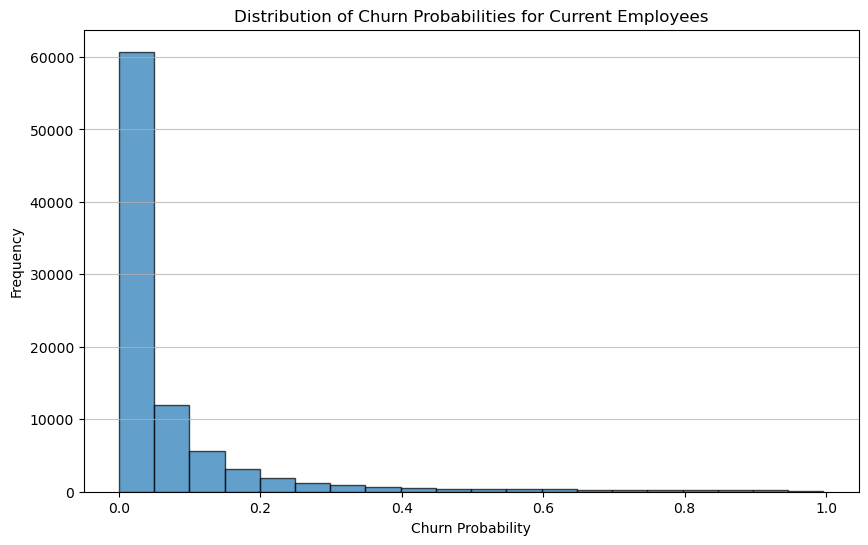

In [ ]:
# Assuming churn probabilities for current employees have already been calculated in `current_employees` dataset

# Plotting churn probability distribution
plt.figure(figsize=(10, 6))
plt.hist(current_employees['Churn_Probability'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Churn Probabilities for Current Employees')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


The distribution shows that most employees have a low churn probability (close to 0), with a gradual decline as the probability increases. A small group of employees exhibits high churn probabilities (closer to 1), indicating a higher risk of resignation.

In [ ]:
top_risk_employees = current_employees.sort_values(by='Churn_Probability', ascending=False).head(10).reset_index()

top_risk_employees

,index,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Churn_Probability
0,58580,4,1,50,3,2,0,5,9000,51,9,24,4,75,5,83,0,3.21,0.996288
1,99206,5,0,28,2,4,0,5,7500,47,12,11,5,50,8,65,1,3.32,0.994918
2,73562,5,0,39,6,5,1,5,5250,48,31,8,6,50,16,94,0,1.94,0.993355
3,64661,0,0,50,3,5,0,1,6600,44,21,23,10,50,7,29,0,1.63,0.991138
4,37715,4,0,25,6,5,1,3,4550,47,24,11,2,25,7,25,0,2.99,0.990026
5,5845,5,0,35,0,4,0,2,4800,59,45,15,4,100,4,75,1,3.43,0.990007
6,79293,1,0,41,5,2,1,3,5850,45,33,26,2,50,10,55,1,3.34,0.989179
7,32156,3,0,55,1,1,1,3,7150,34,9,20,12,0,13,92,0,2.42,0.987829
8,90994,5,0,37,5,7,0,2,5400,46,42,17,5,0,12,78,0,3.58,0.986527
9,99289,3,0,33,1,3,1,5,8250,45,12,13,4,0,11,84,0,2.77,0.986273


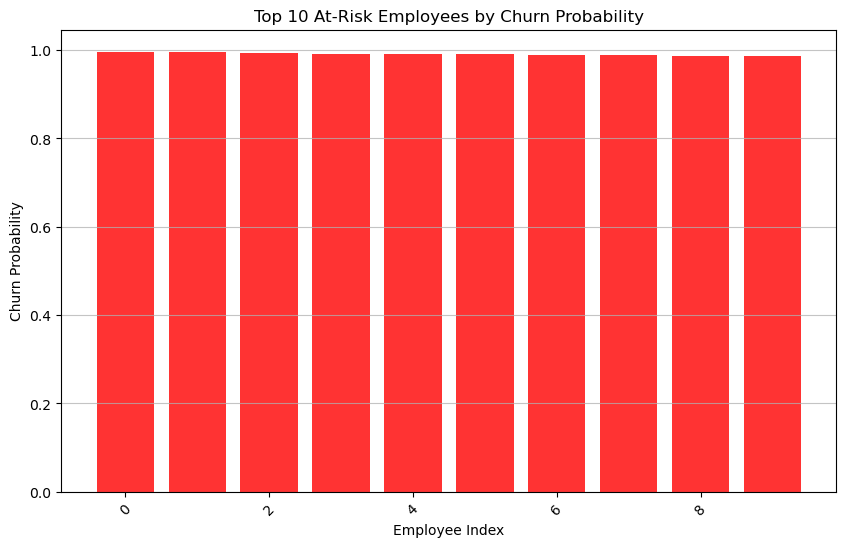

In [ ]:
# Highlight top at-risk employees
plt.figure(figsize=(10, 6))
plt.bar(
    top_risk_employees.index,
    top_risk_employees['Churn_Probability'],
    color='red',
    alpha=0.8
)
plt.title('Top 10 At-Risk Employees by Churn Probability')
plt.xlabel('Employee Index')
plt.ylabel('Churn Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
for column, le in label_encoders.items():
    top_risk_employees[column] = le.inverse_transform(top_risk_employees[column])

In [ ]:
top_risk_employees

,index,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Churn_Probability
0,58580,IT,Male,50,Engineer,2,Bachelor,5,9000,51,9,24,4,75,5,83,0,3.21,0.996288
1,99206,Legal,Female,28,Developer,4,Bachelor,5,7500,47,12,11,5,50,8,65,1,3.32,0.994918
2,73562,Legal,Female,39,Technician,5,High School,5,5250,48,31,8,6,50,16,94,0,1.94,0.993355
3,64661,Customer Support,Female,50,Engineer,5,Bachelor,1,6600,44,21,23,10,50,7,29,0,1.63,0.991138
4,37715,IT,Female,25,Technician,5,High School,3,4550,47,24,11,2,25,7,25,0,2.99,0.990026
5,5845,Legal,Female,35,Analyst,4,Bachelor,2,4800,59,45,15,4,100,4,75,1,3.43,0.990007
6,79293,Engineering,Female,41,Specialist,2,High School,3,5850,45,33,26,2,50,10,55,1,3.34,0.989179
7,32156,HR,Female,55,Consultant,1,High School,3,7150,34,9,20,12,0,13,92,0,2.42,0.987829
8,90994,Legal,Female,37,Specialist,7,Bachelor,2,5400,46,42,17,5,0,12,78,0,3.58,0.986527
9,99289,HR,Female,33,Consultant,3,High School,5,8250,45,12,13,4,0,11,84,0,2.77,0.986273


In [ ]:
churn_data = current_employees.copy()

for column, le in label_encoders.items():
    churn_data[column] = le.inverse_transform(churn_data[column])

churn_data

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Churn_Probability
0,IT,Male,55,Specialist,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,0.441406
1,Finance,Male,29,Developer,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,0.001716
2,Finance,Male,55,Specialist,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,0.081848
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,0.010663
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,0.020458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,IT,Female,56,Engineer,0,Bachelor,1,6600,57,29,27,14,75,5,22,1,4.01,0.006737
99995,Finance,Male,27,Technician,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,0.015797
99997,Operations,Male,53,Analyst,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,0.201024
99998,HR,Female,22,Consultant,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,0.243237


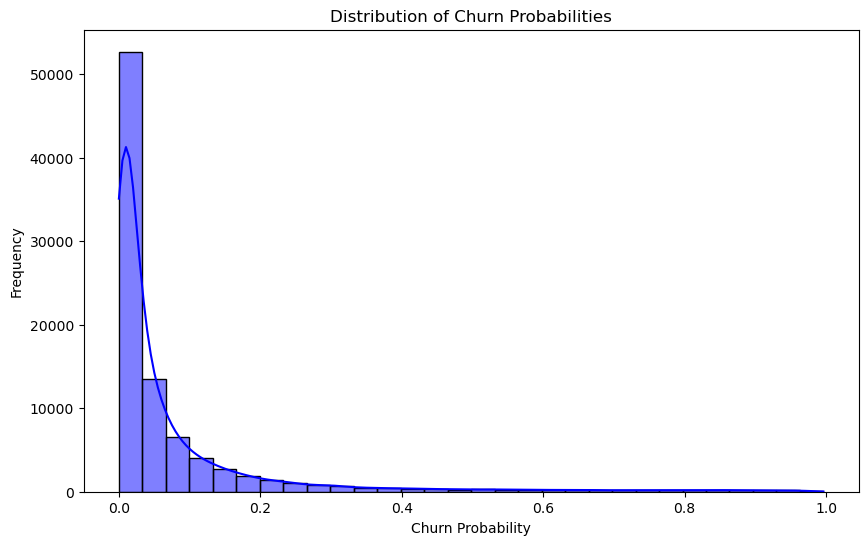

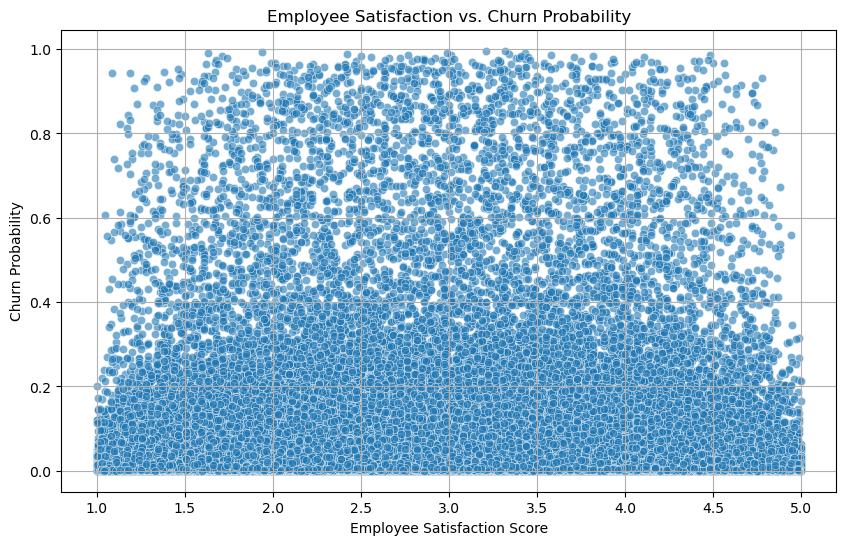

/var/folders/t7/vzjlwhc955bf9vkl0hbrbbfc0000gn/T/ipykernel_28641/3582755624.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_churn.index, y=department_churn.values, palette="viridis")


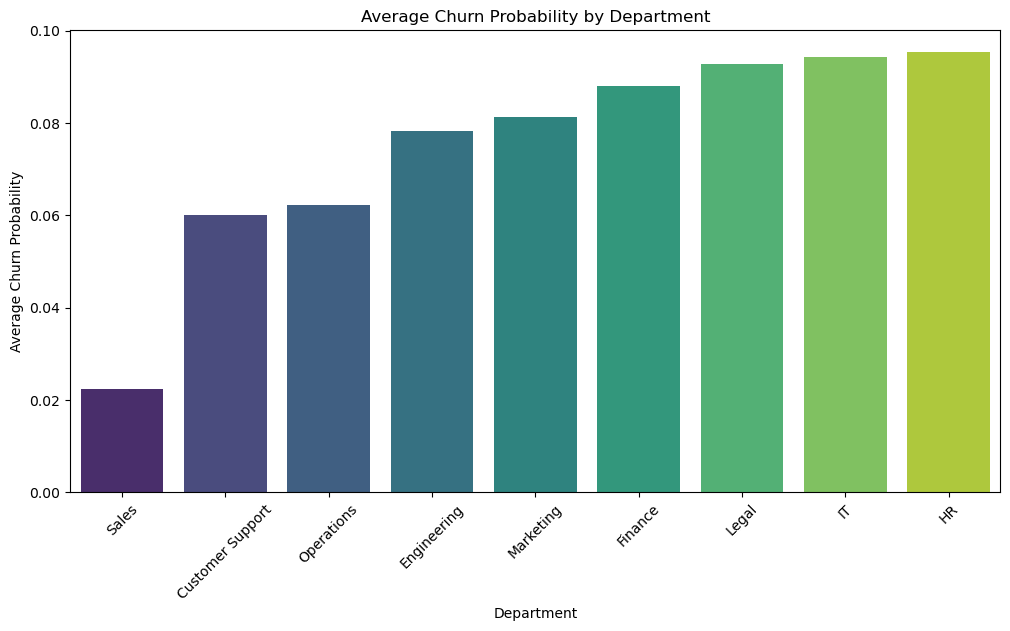

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to analyze relationships between numerical features
# plt.figure(figsize=(12, 8))
# correlation_matrix = churn_data.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Heatmap of Employee Features")
# plt.show()

# distribution of churn probabilities
plt.figure(figsize=(10, 6))
sns.histplot(churn_data['Churn_Probability'], bins=30, kde=True, color='blue')
plt.title("Distribution of Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.show()

# Relationship between Employee Satisfaction and Churn Probability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_Satisfaction_Score', y='Churn_Probability', data=churn_data, alpha=0.6)
plt.title("Employee Satisfaction vs. Churn Probability")
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Churn Probability")
plt.grid()
plt.show()

# Average churn probability by department
department_churn = churn_data.groupby("Department")['Churn_Probability'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_churn.index, y=department_churn.values, palette="viridis")
plt.title("Average Churn Probability by Department")
plt.xlabel("Department")
plt.ylabel("Average Churn Probability")
plt.xticks(rotation=45)
plt.show()


In [1]:
# Filter employees with high churn probabilities
high_churn_employees = churn_data[churn_data['Churn_Probability'] >= 0.75]

# Summarize key statistics for high churn employees
high_churn_summary = high_churn_employees.describe()

# Identify most common attributes among high churn employees (e.g., Department, Job Title, etc.)
high_churn_common_attributes = high_churn_employees[['Department', 'Job_Title', 'Education_Level', 'Promotions', 'Remote_Work_Frequency', 'Years_At_Company']].mode()

# import ace_tools as tools; tools.display_dataframe_to_user(
#     name="High Churn Employees Summary", dataframe=high_churn_employees
# )

high_churn_summary
high_churn_common_attributes

NameError: name 'churn_data' is not defined

In [ ]:
high_churn_summary, high_churn_common_attributes

(               Age  Years_At_Company  Performance_Score  Monthly_Salary  \
 count  1193.000000       1193.000000        1193.000000     1193.000000   
 mean     40.890193          4.034367           2.995809     6446.102263   
 std      10.158336          2.206912           1.425728     1357.524511   
 min      22.000000          0.000000           1.000000     3850.000000   
 25%      32.000000          2.000000           2.000000     5250.000000   
 50%      41.000000          4.000000           3.000000     6500.000000   
 75%      50.000000          6.000000           4.000000     7500.000000   
 max      60.000000          8.000000           5.000000     9000.000000   
 
        Work_Hours_Per_Week  Projects_Handled  Overtime_Hours    Sick_Days  \
 count          1193.000000       1193.000000     1193.000000  1193.000000   
 mean             44.354568         23.646270       13.998324     6.583403   
 std               7.677159         13.082557        7.406010     3.388932   
 m

In [ ]:
# Define a threshold for "low churn probability" (e.g., bottom 25% of churn probabilities)
# low_churn_threshold = churn_data['Churn_Probability'].quantile(0.25)

# Filter employees with high churn probabilities
low_churn_employees = churn_data[churn_data['Churn_Probability'] <= 0.25]

# Summarize key statistics for high churn employees
low_churn_summary = low_churn_employees.describe()

# Identify most common attributes among high churn employees (e.g., Department, Job Title, etc.)
low_churn_common_attributes = low_churn_employees[['Department', 'Job_Title', 'Education_Level', 'Promotions', 'Remote_Work_Frequency', 'Years_At_Company']].mode()

# import ace_tools as tools; tools.display_dataframe_to_user(
#     name="High Churn Employees Summary", dataframe=high_churn_employees
# )

low_churn_summary, low_churn_common_attributes

(                Age  Years_At_Company  Performance_Score  Monthly_Salary  \
 count  83393.000000      83393.000000       83393.000000    83393.000000   
 mean      41.029439          4.508568           2.997374     6401.044452   
 std       11.343182          2.903986           1.417950     1376.764305   
 min       22.000000          0.000000           1.000000     3850.000000   
 25%       31.000000          2.000000           2.000000     5250.000000   
 50%       41.000000          5.000000           3.000000     6500.000000   
 75%       51.000000          7.000000           4.000000     7500.000000   
 max       60.000000         10.000000           5.000000     9000.000000   
 
        Work_Hours_Per_Week  Projects_Handled  Overtime_Hours     Sick_Days  \
 count         83393.000000      83393.000000    83393.000000  83393.000000   
 mean             44.996606         24.471155       14.530416      7.035878   
 std               9.026365         14.590907        8.752695      4